# Flu Trends - Exploratory Data Analysis

Explore the dataset `flu_trends.csv` to uncover trends, seasonality and other hidden patterns within the data.

# Setup Notebook

## Import

In [1]:
# Import Standard Libraries
import numpy as np
import pandas as pd
from pathlib import Path
import os
from sklearn.linear_model import LinearRegression

# Import Package Modules
from src.general_utils.general_utils import (
    read_configuration, 
    read_data_from_config
)
from src.exploratory_data_analysis.exploratory_data_analysis_utils import (
    set_plot_characteristics,
    plot_time_series,
    plot_predictions_vs_time_series, 
    plot_moving_average
)

## Define Configuration

In [2]:
# Retrieve root path
root_path = Path(os.getcwd()).parents[1]

# Read configuration variables
config = read_configuration(root_path / 'configuration' / 'flu_trends_config.yaml')

# Extract configuration variables
dataset_config = config['dataset_config']
plot_characteristics = config['plot_characteristics']

[06/25/2024 20:54:00 - general_utils] INFO - read_configuration - Start
[06/25/2024 20:54:00 - general_utils] INFO - read_configuration - Reading /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml
[06/25/2024 20:54:00 - general_utils] INFO - read_configuration - Configuration file /Users/s.porreca/Projects/TimeWarpForecast/configuration/flu_trends_config.yaml read successfully
[06/25/2024 20:54:00 - general_utils] INFO - read_configuration - End


## Setup Plot Characteristics

In [3]:
set_plot_characteristics(plot_characteristics)

[06/25/2024 20:54:00 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Start
[06/25/2024 20:54:00 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - Creating theme parameters
[06/25/2024 20:54:00 - exploratory_data_analysis_utils] INFO - set_plot_characteristics - End


# Read Data

In [4]:
# Read dataset
dataset = read_data_from_config(dataset_config)

[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - Start
[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - Retrieve data path
[06/25/2024 20:54:00 - general_utils] INFO - build_path_from_list - Start
[06/25/2024 20:54:00 - general_utils] INFO - build_path_from_list - Retrieve root path to the project folder
[06/25/2024 20:54:00 - general_utils] INFO - build_path_from_list - Build the absolute path
[06/25/2024 20:54:00 - general_utils] INFO - build_path_from_list - End
[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - Retrieved data path /Users/s.porreca/Projects/TimeWarpForecast/data/raw/flu_trends.csv
[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - Reading data with date columns
[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - Successfully read data with 366 rows and 131 columns
[06/25/2024 20:54:00 - general_utils] INFO - read_data_from_config - End


# Exploratory Data Analysis

## Plot Time Series

[06/25/2024 20:54:00 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/25/2024 20:54:00 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Calling the plt.show()


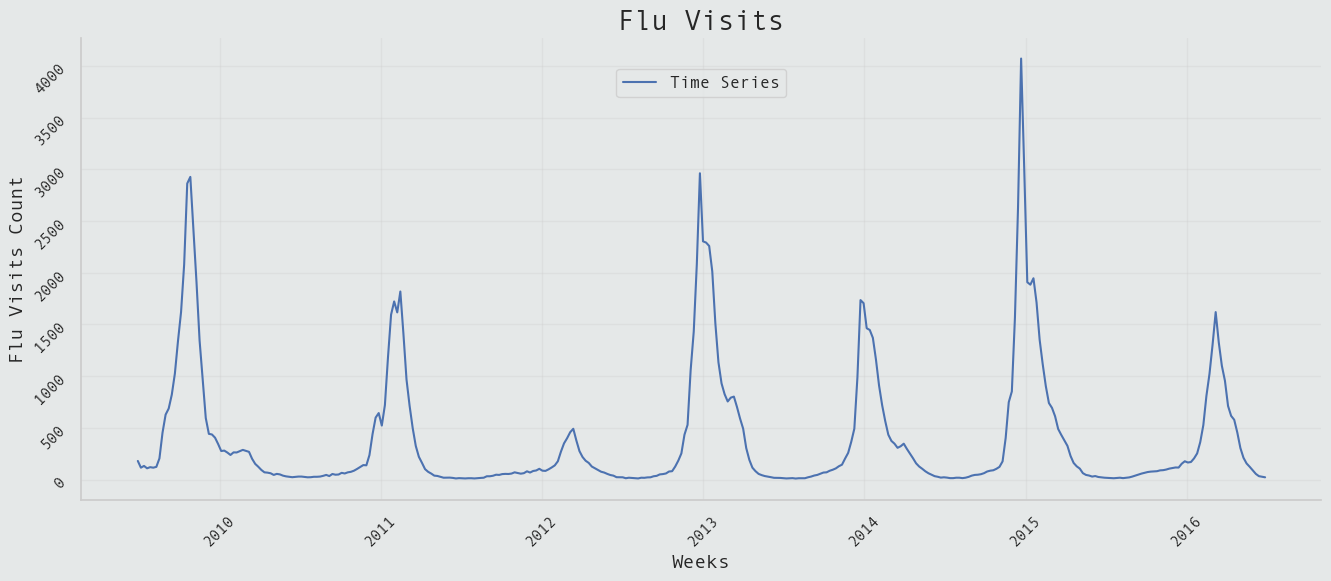

[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - End


<Figure size 1600x600 with 0 Axes>

In [5]:
ax = plot_time_series(dataset, 
                      columns=('Week', 'FluVisits'), 
                      title='Flu Visits', 
                      labels=('Weeks', 'Flu Visits Count', 'Time Series'), 
                      to_plot=True)

## Moving Average

[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Start
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Setting index
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Computing the moving average
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot time series
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Plot moving average
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - Set plot configurations


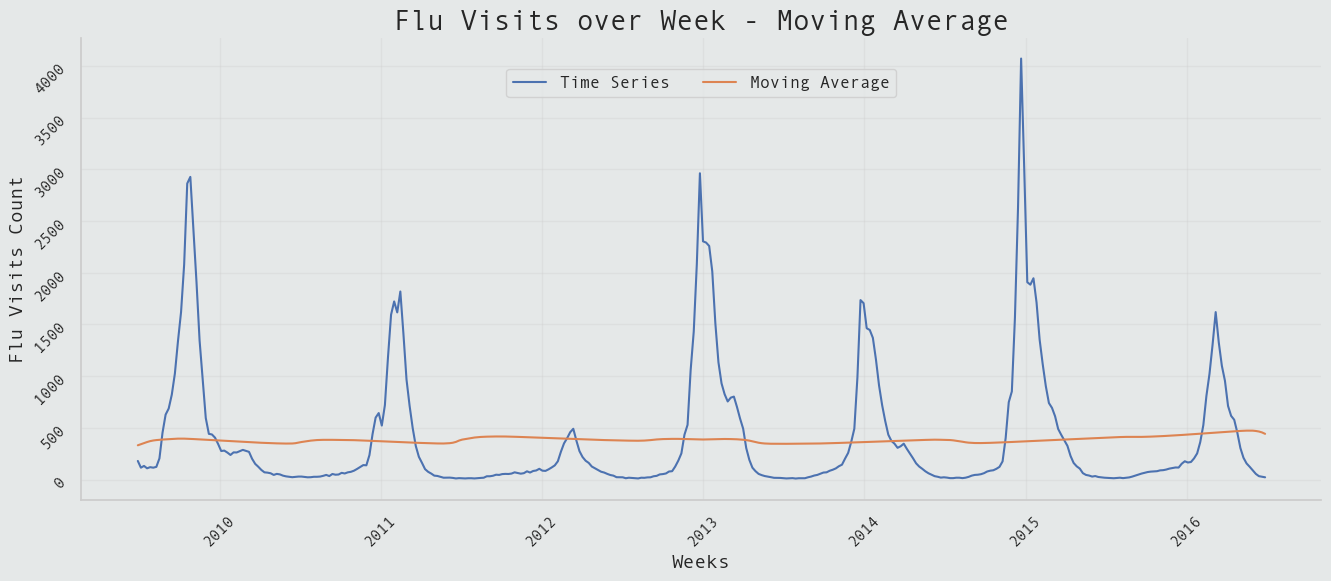

[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_moving_average - End


<Axes: title={'center': 'Flu Visits over Week - Moving Average'}, xlabel='Weeks', ylabel='Flu Visits Count'>

<Figure size 1600x600 with 0 Axes>

In [6]:
plot_moving_average(time_series=dataset, 
                    rolling_settings={
                        'window': 365, 
                        'center': True, 
                        'min_periods': 183}, 
                    columns=('Week', 'FluVisits'), 
                    title='Flu Visits over Week - Moving Average', 
                    labels=('Weeks', 'Flu Visits Count', 'Moving Average'))


# Data Preparation

## Time-step Feature

In [7]:
# Add 'Time' feature
dataset['Time'] = np.arange(len(dataset))

# Model Training

## Linear Regression with Time-step Feature

[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Start
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Extract time series and predictions
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot tim series
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Start
[06/25/2024 20:54:01 - exploratory_data_analysis_utils] INFO - plot_time_series - Plot time series
[06/25/2024 20:54:02 - exploratory_data_analysis_utils] INFO - plot_time_series - Set plot configurations
[06/25/2024 20:54:02 - exploratory_data_analysis_utils] INFO - plot_time_series - End
[06/25/2024 20:54:02 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Plot predicted values
[06/25/2024 20:54:02 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - Calling the plt.show()


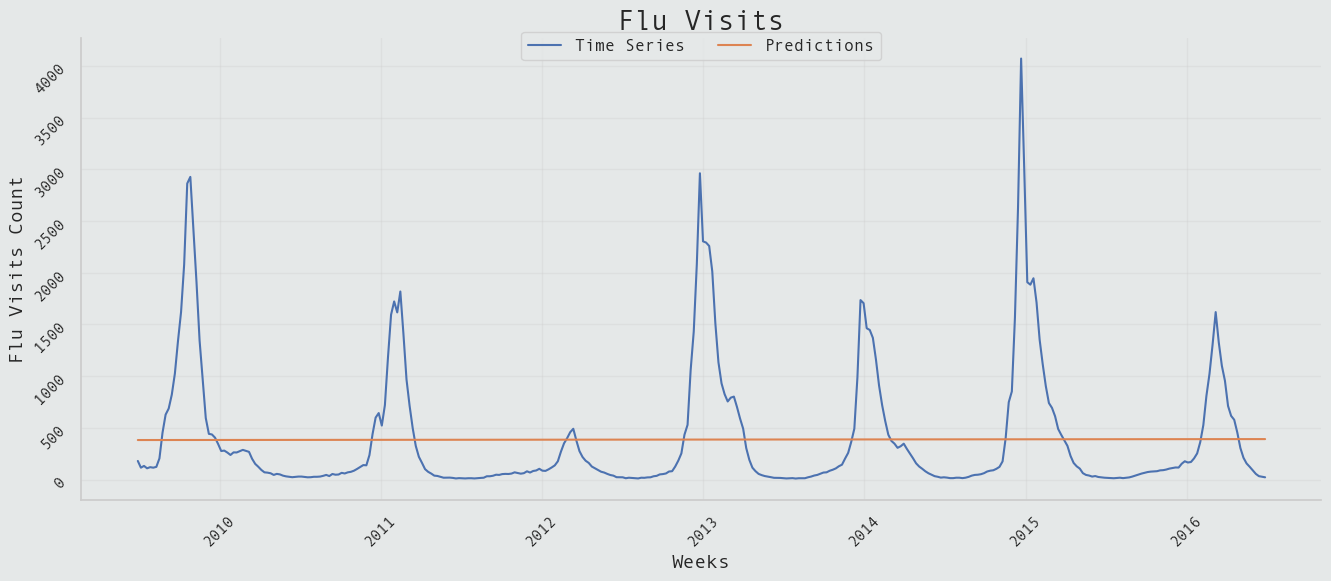

[06/25/2024 20:54:02 - exploratory_data_analysis_utils] INFO - plot_predictions_vs_time_series - End


<Axes: title={'center': 'Flu Visits'}, xlabel='Weeks', ylabel='Flu Visits Count'>

<Figure size 1600x600 with 0 Axes>

In [8]:
# Define x, y
x = dataset.loc[:, ['Time']]
y = dataset.loc[:, ['FluVisits']]

# Instance model
model_lr_time_step = LinearRegression()

# Fit model
model_lr_time_step.fit(x, y)

# Produce prediction
predictions_lr_time_step = model_lr_time_step.predict(x)

# Show predictions
plot_predictions_vs_time_series(data=(dataset, predictions_lr_time_step.reshape(-1)),
                                columns=('Week', 'FluVisits'),
                                title='Flu Visits',
                                labels=('Weeks', 'Flu Visits Count', 'Predictions'), 
                                to_plot=True)

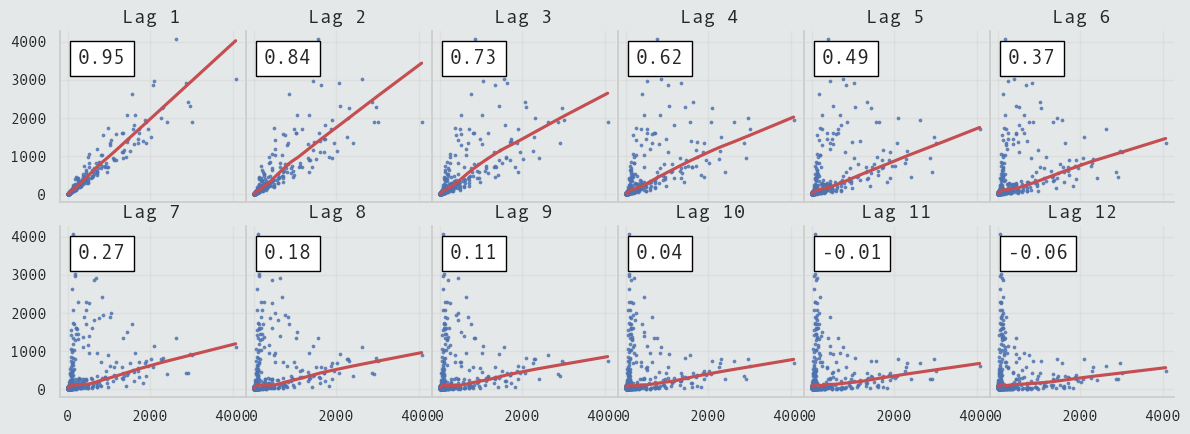

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib.offsetbox import AnchoredText

def lagplot(x, lag=1, ax=None, **kwargs):

    x_ = x.shift(lag)
    y_ = x
    corr = y_.corr(x_)
    if ax is None:
        fig, ax = plt.subplots()
    scatter_kws = dict(
        alpha=0.75,
        s=3,
    )
    line_kws = dict(color='C3', )
    ax = sns.regplot(x=x_,
                     y=y_,
                     scatter_kws=scatter_kws,
                     line_kws=line_kws,
                     lowess=True,
                     ax=ax,
                     **kwargs)
    at = AnchoredText(
        f"{corr:.2f}",
        prop=dict(size="large"),
        frameon=True,
        loc="upper left",
    )
    at.patch.set_boxstyle("square, pad=0.0")
    ax.add_artist(at)
    ax.set(title=f"Lag {lag}", xlabel=x_.name, ylabel=y_.name)
    return ax

def plot_lags(time_series, lags, nrows, **kwargs):

    # Compute the number of columns for the plot
    ncols = math.ceil(lags / nrows)
    
    # Plot settings
    plot_settings = {
        'nrows': nrows,
        'ncols': ncols,
        'figsize': (ncols * 2, nrows * 2 + 0.5),
    }
    
    # Define figure and axes
    figure, axes = plt.subplots(sharex=True, sharey=True, squeeze=False, **plot_settings)
    
    # Fetch the lags to plot
    for axis, lag_value in zip(figure.get_axes(), range(nrows * ncols)):
        
        # plo the lag
        axis = lagplot(time_series, lag=lag_value + 1, ax=axis)
        
        # Set lag plot configurations
        axis.set_title(f"Lag {lag_value + 1}", fontdict=dict(fontsize=14))
        axis.set(xlabel="", ylabel="")
        
    figure.tight_layout(w_pad=0.1, h_pad=0.1)
    return figure

_ = plot_lags(dataset.FluVisits, lags=12, nrows=2)